# SciPy - Library of scientific algorithms for Python

Jean-Marc Casandjian

based on:

http://dml.riken.jp/~rob/
 [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).

http://lmfit.github.io/lmfit-py/

http://iminuit.readthedocs.org/en/latest/


## Introduction

The SciPy framework builds on top of the low-level NumPy framework for multidimensional arrays, and provides a large number of higher-level scientific algorithms. Some of the topics that SciPy covers are:

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

Each of these submodules provides a number of functions and classes that can be used to solve problems in their respective topics.

In this lecture we will look at how to use some of these subpackages.



### Prerequisite

In [ ]:
%%bash

pip install iminuit
pip install lmfit
pip install http://sourceforge.net/projects/matplotlib/files/matplotlib-toolkits/natgrid-0.2/natgrid-0.2.1.tar.gz/download

In [1]:
import scipy

In [2]:
help(scipy)
#dir(scipy)

Help on package scipy:

NAME
    scipy

FILE
    /opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/__init__.py

DESCRIPTION
    SciPy: A scientific computing package for Python
    
    Documentation is available in the docstrings and
    online at http://docs.scipy.org.
    
    Contents
    --------
    SciPy imports all the functions from the NumPy namespace, and in
    addition provides:
    
    Subpackages
    -----------
    Using any of these subpackages requires an explicit import.  For example,
    ``import scipy.cluster``.
    
    ::
    
     cluster                      --- Vector Quantization / Kmeans
     fftpack                      --- Discrete Fourier Transform algorithms
     integrate                    --- Integration routines
     interpolate                  --- Interpolation Tools
     io                           --- Data input and output
     lib                          --- Python wrappers to external libraries
   

## Integration

### Numerical integration: quadrature

Numerical evaluation of a function of the type

$\displaystyle \int_a^b f(x) dx$

is called *numerical quadrature*, or simply *quadature*. SciPy provides a series of functions for different kind of quadrature, for example the `quad`, `dblquad` and `tplquad` for single, double and triple integrals, respectively.



In [4]:
import scipy.integrate
help(scipy.integrate)

Help on package scipy.integrate in scipy:

NAME
    scipy.integrate

FILE
    /opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/integrate/__init__.py

DESCRIPTION
    Integration and ODEs (:mod:`scipy.integrate`)
    
    .. currentmodule:: scipy.integrate
    
    Integrating functions, given function object
    
    .. autosummary::
       :toctree: generated/
    
       quad          -- General purpose integration
       dblquad       -- General purpose double integration
       tplquad       -- General purpose triple integration
       nquad         -- General purpose n-dimensional integration
       fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
       quadrature    -- Integrate with given tolerance using Gaussian quadrature
       romberg       -- Integrate func using Romberg integration
    
    Integrating functions, given fixed samples
    
    .. autosummary::
       :toctree: generated/
    
       cumtrap

The `quad` function takes a large number of optional arguments, which can be used to fine-tune the behaviour of the function (try `help(quad)` for details).

The basic usage is as follows:

In [6]:
# define a simple function for the integrand
def f(x):
    return x

In [7]:
x_lower = 0 # the lower limit of x
x_upper = 1 # the upper limit of x

val, abserr = scipy.integrate.quad(f, x_lower, x_upper)

print "integral value =", val, ", absolute error =", abserr 

integral value = 0.5 , absolute error = 5.55111512313e-15


For simple functions we can use a lambda function (name-less function) instead of explicitly defining a function for the integrand
```
lambda x: exp(-x ** 2)   
is the same as:
def f(x): return exp(-x ** 2)
```


In [8]:
import numpy
import math
# or: from math import exp,sqrt

val, abserr = scipy.integrate.quad(lambda x: math.exp(-x ** 2), -numpy.inf, numpy.inf)

print "numerical  =", val, abserr

analytical = math.sqrt(math.pi)
print "analytical =", analytical

numerical  = 1.77245385091 1.42026367809e-08
analytical = 1.77245385091


As show in the example above, we can also use 'Inf' or '-Inf' as integral limits.

Higher-dimensional integration works in the same way:

In [9]:
def integrand(x, y):
    return math.exp(-x**2-y**2)

x_lower = 0  
x_upper = 10
y_lower = 0
y_upper = 10

val, abserr = scipy.integrate.dblquad(integrand, x_lower, x_upper, lambda x : y_lower, lambda x: y_upper)

print val, abserr 

0.785398163397 1.63822994214e-13


Note how we had to pass lambda functions for the limits for the y integration, since these in general can be functions of x.

## Linear algebra

The linear algebra module contains a lot of matrix related functions, including linear equation solving, eigenvalue solvers, matrix functions (for example matrix-exponentiation), a number of different decompositions (SVD, LU, cholesky), etc. 

Detailed documetation is available at: http://docs.scipy.org/doc/scipy/reference/linalg.html

Here we will look at how to use some of these functions:



### Linear equation systems

Linear equation systems on the matrix form

$A x = b$

where $A$ is a matrix and $x,b$ are vectors can be solved like:

In [10]:
A = numpy.array([[1,2,3], [4,5,6], [7,8,9]])
b = numpy.array([1,2,3])

In [11]:
x = scipy.linalg.solve(A, b)

print x

[-0.33333333  0.66666667  0.        ]


In [12]:
# check
scipy.dot(A, x) - b

array([ -1.11022302e-16,   0.00000000e+00,   0.00000000e+00])

We can also do the same with

$A X = B$

where $A, B, X$ are matrices:

In [13]:
A = scipy.rand(3,3)
B = scipy.rand(3,3)

In [14]:
X = scipy.linalg.solve(A, B)

In [15]:
print X

[[ -99.63944053 -162.83104926  -51.7454759 ]
 [   8.25698314   14.8747564     4.55161152]
 [  83.47486212  133.55808407   43.76330105]]


In [16]:
# check
scipy.linalg.norm(scipy.dot(A, X) - B)

2.159890316254684e-14

### Matrix operations

In [17]:
# the matrix inverse
scipy.linalg.inv(A)

array([[-112.65193319, -292.59841255,  188.76939812],
       [  10.87528619,   24.06902436,  -15.95335191],
       [  91.66855109,  241.54792261, -154.17267539]])

In [18]:
# determinant
scipy.linalg.det(A)

0.0016214604651229134

## Sparse matrices

Sparse matrices are often useful in numerical simulations dealing with large systems, if the problem can be described in matrix form where the matrices or vectors mostly contains zeros. Scipy has a good support for sparse matrices, with basic linear algebra operations (such as equation solving, eigenvalue calculations, etc).

There are many possible strategies for storing sparse matrices in an efficient way. Some of the most common are the so-called coordinate form (COO), list of list (LIL) form,  and compressed-sparse column CSC (and row, CSR). Each format has some advantanges and disadvantages. Most computational algorithms (equation solving, matrix-matrix multiplication, etc) can be efficiently implemented using CSR or CSC formats, but they are not so intuitive and not so easy to initialize. So often a sparse matrix is initially created in COO or LIL format (where we can efficiently add elements to the sparse matrix data), and then converted to CSC or CSR before used in real calcalations.

For more information about these sparse formats, see e.g. http://en.wikipedia.org/wiki/Sparse_matrix

When we create a sparse matrix we have to choose which format it should be stored in. For example, 

In [19]:
import scipy.sparse

More efficient way to create sparse matrices: create an empty matrix and populate with using matrix indexing (avoids creating a potentially large dense matrix)

In [20]:
A = scipy.sparse.lil_matrix((4,4)) # empty 4x4 sparse matrix
A[0,0] = 1
A[1,1] = 3
A[2,2] = A[2,1] = 1
A[3,3] = A[3,0] = 1
print A

  (0, 0)	1.0
  (1, 1)	3.0
  (2, 1)	1.0
  (2, 2)	1.0
  (3, 0)	1.0
  (3, 3)	1.0


In [21]:
print A.todense()

[[ 1.  0.  0.  0.]
 [ 0.  3.  0.  0.]
 [ 0.  1.  1.  0.]
 [ 1.  0.  0.  1.]]


Converting between different sparse matrix formats:

In [22]:
print (A * A).todense()

[[ 1.  0.  0.  0.]
 [ 0.  9.  0.  0.]
 [ 0.  4.  1.  0.]
 [ 2.  0.  0.  1.]]


# Fit

## Fit using scipy  optimization

Optimization (finding minima or maxima of a function) is a large field in mathematics, and optimization of complicated functions or in many variables can be rather involved. Here we will only look at a few very simple cases. For a more detailed introduction to optimization with SciPy see: http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html

To use the optimization module in scipy first include the `optimize` module:

In [23]:
import scipy.optimize

Let's first look at how to find the minima of a simple function of a single variable:

Principa:  create a function of the form:  $\displaystyle \frac{data-model}{error}$

Then a function that square and sun the previous function and use a scipy.optimize.minimize to minimize this sum:

In [ ]:
help(scipy.optimize.minimize)

or use the Least-square fitting (leastsq) function that   the fit concistes in miminizing the sum of squares of this fucntions (no need to create the sum of square).
"leastsq" is a wrapper around MINPACK's lmdif and lmder algorithms (Fortran, Levenberg-Marquardt method)

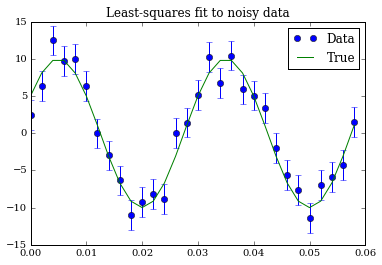

In [26]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
# create data points:
A, k, theta = 10, 1.0/3e-2, numpy.pi/6  # variables needed to create data from function
E_exp = numpy.arange(0, 6e-2, 6e-2 / 30) 
F_theo = A * numpy.sin(2 * numpy.pi * k * E_exp + theta)
F_exp = F_theo + 2*numpy.random.randn(len(E_exp))
error=2

plt.errorbar(E_exp,F_exp,yerr=error,fmt='o')
plt.plot(E_exp,F_theo,'-')
plt.title('Least-squares fit to noisy data')
plt.legend(['Data', 'True'])
plt.show()

In [28]:
# create the residual function 
def residuals(p, F, E, errors):
    A,k,theta = p
    return (F - A*numpy.sin(2*numpy.pi*k*E+theta))/errors

In [29]:
p0 = [8, 1 / 4e-2, numpy.pi/5]
plsq = scipy.optimize.leastsq(residuals, p0, args=(F_exp, E_exp, error))

In [30]:
print(plsq)[0]

[  9.83699173  33.51395884   0.46720626]


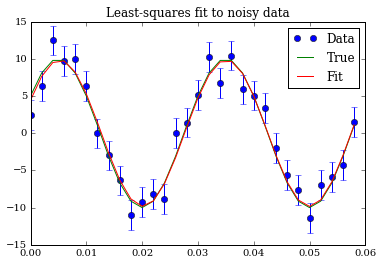

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt
def peval(E, p):
    return p[0] * numpy.sin(2 * numpy.pi * p[1] * E + p[2])
plt.errorbar(E_exp,F_exp,yerr=error,fmt='o')
plt.plot(E_exp,F_theo,'-')
plt.plot(E_exp, peval(E_exp, plsq[0]))
plt.title('Least-squares fit to noisy data')
plt.legend(['Data','True','Fit'])
plt.show()

# Fit using lmfit

Lmfit provides a high-level interface to non-linear optimization and curve fitting problems for Python. Uses the same "leastsq" routine as above.

In [32]:
import lmfit

def residual(params, x, data, eps_data):
    amp = params['amp'].value
    freq = params['frequency'].value
    pshift = params['phase'].value
    model = amp * numpy.sin(2 * numpy.pi * freq *x  + pshift) 
    return (data-model)/eps_data

params = lmfit.Parameters()
params.add('amp', value=8)
params.add('frequency', value=  1 / 4e-2)
params.add('phase', value=numpy.pi/5.)
result = lmfit.minimize(residual, params, args=(E_exp, F_exp, error))


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [33]:
lmfit.printfuncs.report_fit(result.params) 

[[Variables]]
    amp:         9.83699173 +/- 0.448035 (4.55%) (init= 8)
    frequency:   33.5139588 +/- 0.410008 (1.22%) (init= 25)
    phase:       0.46720625 +/- 0.090190 (19.30%) (init= 0.6283185)
[[Correlations]] (unreported correlations are <  0.100)
    C(frequency, phase)          = -0.866 
    C(amp, frequency)            =  0.116 
    C(amp, phase)                = -0.102 


In [34]:
ci = lmfit.conf_interval(result)
lmfit.printfuncs.report_ci(ci)

             99.70%    95.00%    67.40%     0.00%    67.40%    95.00%    99.70%
    phase   0.18853   0.29030   0.38018   0.47603   0.55601   0.65148   0.76440
      amp   8.37728   8.91849   9.38890   9.83699  10.28533  10.75695  11.29929
frequency  32.12951  32.65686  33.10118  33.46686  33.91816  34.33549  34.80864


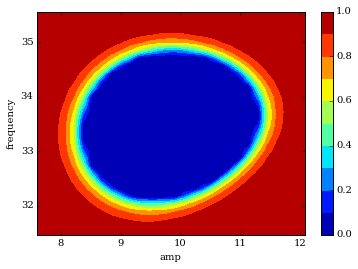

In [35]:
import matplotlib.pylab as plt
x, y, grid = lmfit.conf_interval2d(result,'amp','frequency',30,30)
plt.contourf(x, y, grid, numpy.linspace(0,1,11))
plt.xlabel('amp')
plt.colorbar()
plt.ylabel('frequency')
plt.show()

## Fit using lmfit "models" module

The Model class provides a general way to wrap a pre-defined function as a fitting model.

In [36]:
dir(lmfit.Model)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__div__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__mul__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_forbidden_args',
 '_handle_missing',
 '_hint_names',
 '_invalid_hint',
 '_invalid_ivar',
 '_invalid_missing',
 '_invalid_par',
 '_make_all_args',
 '_parse_params',
 '_reprstring',
 '_residual',
 '_strip_prefix',
 '_valid_missing',
 'components',
 'copy',
 'eval',
 'eval_components',
 'fit',
 'guess',
 'make_funcargs',
 'make_params',
 'name',
 'param_names',
 'prefix',
 'set_param_hint']

Lmfit provides several builtin fitting models in the models module.

In [37]:
dir(lmfit.models)

['BreitWignerModel',
 'COMMON_DOC',
 'ConstantModel',
 'DampedOscillatorModel',
 'DimensionalError',
 'DonaichModel',
 'ExponentialGaussianModel',
 'ExponentialModel',
 'ExpressionModel',
 'GaussianModel',
 'Interpreter',
 'LinearModel',
 'LognormalModel',
 'LorentzianModel',
 'Model',
 'ParabolicModel',
 'Pearson7Model',
 'PolynomialModel',
 'PowerLawModel',
 'PseudoVoigtModel',
 'QuadraticModel',
 'RectangleModel',
 'SkewedGaussianModel',
 'StepModel',
 'StudentsTModel',
 'VoigtModel',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '_validate_1d',
 'breit_wigner',
 'damped_oscillator',
 'donaich',
 'expgaussian',
 'exponential',
 'fwhm_expr',
 'gaussian',
 'get_ast_names',
 'guess_from_peak',
 'index_of',
 'linear',
 'lineshapes',
 'logistic',
 'lognormal',
 'lorentzian',
 'np',
 'parabolic',
 'pearson7',
 'powerlaw',
 'pvoigt',
 'rectangle',
 'skewed_gaussian',
 'skewed_voigt',
 'step',
 'students_t',
 'update_param_vals',
 'voigt']

For example, a model with a Lorentzian on a linear background:

In [ ]:
background  = lmfit.models.LinearModel()
peak1 = lmfit.models.LorentzianModel(prefix='peak1_')
peak2 = lmfit.models.LorentzianModel(prefix='peak2_')
model = peak + background
model.fit( ....  # see exercise

The previous fit can be simply expressed as:

In [38]:
model = lmfit.models.ExpressionModel('amp * sin(2 * pi * freq *x  + pshift)')
params = model.make_params(amp=8., freq=1./4e-2, pshift=numpy.pi/5.)
out  = model.fit(F_exp, params, x=E_exp)
print(out.fit_report(min_correl=0.25))

[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # function evals   = 37
    # data points      = 30
    # variables        = 3
    chi-square         = 79.840
    reduced chi-square = 2.957
[[Variables]]
    amp:      9.83699173 +/- 0.448035 (4.55%) (init= 8)
    freq:     33.5139588 +/- 0.410008 (1.22%) (init= 25)
    pshift:   0.46720625 +/- 0.090190 (19.30%) (init= 0.6283185)
[[Correlations]] (unreported correlations are <  0.250)
    C(freq, pshift)              = -0.866 


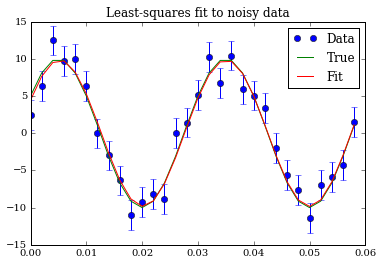

In [39]:
plt.errorbar(E_exp,F_exp,yerr=error,fmt='o')
plt.plot(E_exp,F_theo,'-')
plt.plot(E_exp, out.best_fit)
plt.title('Least-squares fit to noisy data')
plt.legend(['Data','True','Fit'])
plt.show()

## Fit using Minuit

Variable metric method through iminuit (no analytic gradient input in iminuit, see Minuit2 in pyROOT)

In [41]:
import iminuit

def residual(amp,freq,pshift):
    model = amp * numpy.sin(2 * numpy.pi * freq *E_exp  + pshift) 
    diff=(F_exp-model)/error
    return (diff**2).sum()

In [42]:
print iminuit.util.describe(residual)
m = iminuit.Minuit(residual, amp=8., freq=1./4e-2, pshift=numpy.pi/5., error_amp=1., error_freq=1., error_pshift=.1)
m.set_strategy(1)
tmp=m.migrad()

['amp', 'freq', 'pshift']


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: InitialParamWarning: errordef is not given. Default to 1.
  from IPython.kernel.zmq import kernelapp as app


FCN = 19.9600822897 
 TOTAL NCALL = 83 
 NCALLS = 83 
 
 
 EDM = 1.32831736055e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 amp 
 9.836833e+00 
 5.210428e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 freq 
 3.351387e+01 
 4.742458e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 3 
 pshift 
 4.672157e-01 
 1.021652e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & amp & 9.837e+00 & 5.210e-01 & & & & & \\
\hline
2 & freq & 3.351e+01 & 4.742e-01 & & & & & \\
\hline
3 & pshift & 4.672e-01 & 1.022e-01 & & & & & \\
\hline
\end{tabular}

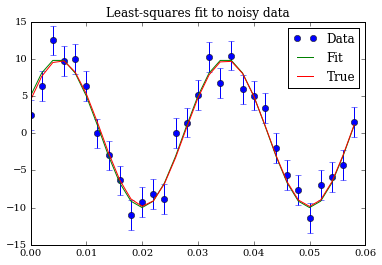

In [43]:
%matplotlib inline

import matplotlib.pyplot as plt
def peval(x, p):
    return p[0] * numpy.sin(2 * numpy.pi * p[1] * x + p[2])
plt.errorbar(E_exp,F_exp,yerr=error,fmt='o')
plt.plot(E_exp,F_theo,'-')
plt.plot(E_exp, peval(E_exp, m.values.values()))
plt.title('Least-squares fit to noisy data')
plt.legend(['Data', 'Fit', 'True'])
plt.show()


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


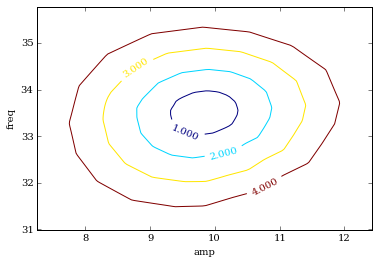

In [44]:
tmp=m.draw_mncontour('amp','freq', nsigma=4);

## Interpolation

Interpolation is simple and convenient in scipy: The `interp1d` function, when given arrays describing X and Y data, returns and object that behaves like a function that can be called for an arbitrary value of x (in the range covered by X), and it returns the corresponding interpolated y value:

In [45]:
import scipy.interpolate

In [46]:
def f(x):
    return numpy.sin(x)

In [47]:
n = numpy.arange(0, 10)  # for data points
x = numpy.linspace(0, 9, 100)  # for smooth functions

y_meas = f(n) + 0.1 * numpy.random.randn(len(n)) # simulate measurement with noise
y_real = f(x)

linear_interpolation = scipy.interpolate.interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = scipy.interpolate.interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

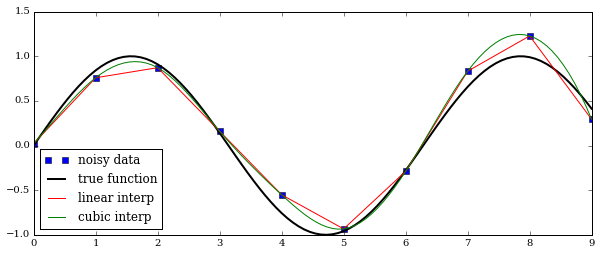

In [48]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='noisy data')
ax.plot(x, y_real, 'k', lw=2, label='true function')
ax.plot(x, y_interp1, 'r', label='linear interp')
ax.plot(x, y_interp2, 'g', label='cubic interp')
ax.legend(loc=3);

## Statistics

The `scipy.stats` module contains a large number of statistical distributions, statistical functions and tests. For a complete documentation of its features, see http://docs.scipy.org/doc/scipy/reference/stats.html.

There is also a very powerful python package for statistical modelling called statsmodels. See http://statsmodels.sourceforge.net for more details.

In [49]:
import scipy.stats

In [50]:
# create a (discreet) random variable with poissionian distribution
X = scipy.stats.poisson(4) # photon distribution for a coherent state with n=3.5 photons
print X

In [51]:
print X.rvs(size=20)  #  generate a set of random variates
print X.pmf(3) # The probability that a given number will be the realization of a discrete random variable

[7 6 5 2 8 4 3 6 6 3 4 2 4 4 1 5 1 4 2 4]
0.195366814813


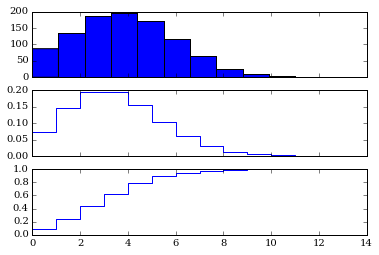

In [52]:
n = numpy.arange(0,15)

fig, axes = plt.subplots(3,1, sharex=True)

# plot histogram of 1000 random realizations of the stochastic variable X
axes[0].hist(X.rvs(size=1000));

# plot the probability mass function 
axes[1].step(n, X.pmf(n))

# plot the commulative distribution function (CDF)
axes[2].step(n, X.cdf(n))



In [53]:
# create a (continous) random variable with normal distribution
Y = scipy.stats.norm()

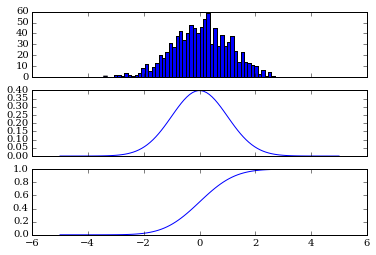

In [54]:
x = numpy.linspace(-5,5,100)

fig, axes = plt.subplots(3,1, sharex=True)

# plot histogram of 1000 random realizations of the stochastic variable Y
axes[0].hist(Y.rvs(size=1000), bins=50);

# plot the probability distribution function (PDF)
axes[1].plot(x, Y.pdf(x))

# plot the commulative distributin function (CDF)
axes[2].plot(x, Y.cdf(x));



Statistics:

In [55]:
X.mean(), X.std(), X.var() # poission distribution

(4.0, 2.0, 4.0)

In [56]:
Y.mean(), Y.std(), Y.var() # normal distribution

(0.0, 1.0, 1.0)

# EXERCICE:

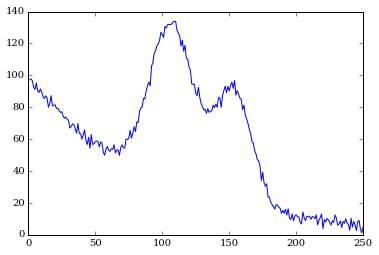

In [58]:
dat = numpy.loadtxt('Gauss2.dat')
x = dat[:, 1]
y = dat[:, 0]
plt.plot(x, y)


#Fit the curve above using models from lmfit.models  
#HINT:

In [ ]:
dat = numpy.loadtxt('Gauss2.dat')
x = dat[:, 1]
y = dat[:, 0]

# dir(lmfit.models) will show all the models available
# try one, place the cursor on function, shift+tab will show the free parameters
background = XXXXXModel(prefix='name_')
pars=background.make_params()  # create the parameter object
pars['name_amplitude'].set(1, min=0, max=10)  # give initial values
pars['name_decay'].set(1, min=0, max=10)  # 


peak1  = XXXXXModel(prefix='name2_')
pars.update( peak1.make_params())  # add the new parameters into the object "pars"
pars['name2_center'].set(1, min=0, max=10)
pars['name2_sigma'].set(1, min=0,max=10)
pars['name2_amplitude'].set(1, min=0,max=10)

......

model = background + peak1 + peak2 
out = model.fit(y, pars, x=x)
# and plot

# Solution

see Scipy-solution.ipynb